In [10]:
import requests
from pprint import pprint
subscription_key = '6de529d484fc429395ff9243d39d2f96'
assert subscription_key
text_analytics_base_url = "https://eastus.api.cognitive.microsoft.com/text/analytics/v2.0/"
sentiment_api_url = text_analytics_base_url + "sentiment"
print(sentiment_api_url)

https://eastus.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment


In [17]:
import json
jsonfile = open('C:/Users/yiyi3/Team5_Microsoft.json')
jsondata = jsonfile.read()
textdata = json.loads(jsondata)
text = list(textdata['text'].values())
label = list(textdata['sentiment'].values())
document = []
i = 1
for t in text:
    dict = {
        "language": "en",
        "id": str(i),
        "text" : t
    }
    document.append(dict)
    i = i + 1
    
documents = {"documents" : document}
print(documents)

{'documents': [{'language': 'en', 'id': '1', 'text': 'Greetings and welcome to the Microsoft Fiscal Year 2018 Third Quarter Earnings Conference Call. As a reminder, this conference is being recorded. It is now my pleasure to introduce your host, Mike Spencer, General Manager of Investor Relations. Thank you. You may begin.'}, {'language': 'en', 'id': '2', 'text': 'Good afternoon and thank you for joining us today. On the call with me are Satya Nadella, Chief Executive Officer; Amy Hood, Chief Financial Officer; Frank Brod, Chief Accounting Officer; and Carolyn Frantz, Deputy General Counsel and Corporate Secretary.'}, {'language': 'en', 'id': '3', 'text': "On the Microsoft Investor Relations website, you can find our earnings press release and financial summary slide deck, which is intended to supplement our prepared remarks during today's call and provides a reconciliation of differences between the GAAP and non-GAAP financial measures."}, {'language': 'en', 'id': '4', 'text': "Unless

In [18]:
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
pprint(sentiments)

{'documents': [{'id': '1', 'score': 0.985567569732666},
               {'id': '2', 'score': 0.8635582327842712},
               {'id': '3', 'score': 0.5},
               {'id': '4', 'score': 0.5},
               {'id': '5', 'score': 0.7688121795654297},
               {'id': '6', 'score': 0.8619561791419983},
               {'id': '7', 'score': 0.5},
               {'id': '8', 'score': 0.5},
               {'id': '9', 'score': 0.9329003095626831},
               {'id': '10', 'score': 0.9553788900375366},
               {'id': '11', 'score': 0.9167450666427612},
               {'id': '12', 'score': 0.5},
               {'id': '13', 'score': 0.5},
               {'id': '14', 'score': 0.8877207040786743},
               {'id': '15', 'score': 0.5},
               {'id': '16', 'score': 0.9282257556915283},
               {'id': '17', 'score': 0.5},
               {'id': '18', 'score': 0.5},
               {'id': '19', 'score': 0.5},
               {'id': '20', 'score': 0.5},
               

<Figure size 432x288 with 0 Axes>

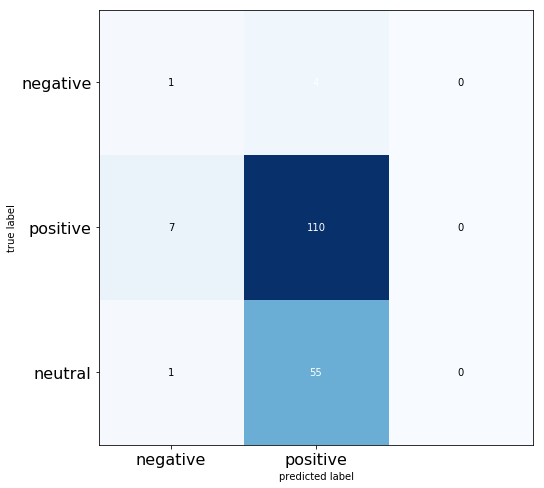

In [21]:
score = sentiments['documents']
predict = []
for s in score:
    if s['score'] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
        
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(label, predict)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['negative','positive'], fontsize=16)
plt.yticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.show()


In [23]:
Score = []
for s in score:
    Score.append(s['score'])
print(Score)

[0.985567569732666, 0.8635582327842712, 0.5, 0.5, 0.7688121795654297, 0.8619561791419983, 0.5, 0.5, 0.9329003095626831, 0.9553788900375366, 0.9167450666427612, 0.5, 0.5, 0.8877207040786743, 0.5, 0.9282257556915283, 0.5, 0.5, 0.5, 0.5, 0.7990192174911499, 0.7421429753303528, 0.9012116193771362, 0.5, 0.8137234449386597, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9080778360366821, 0.5, 0.7052212953567505, 0.8042239546775818, 0.9204750061035156, 0.9269899725914001, 0.8161371350288391, 0.7995163202285767, 0.25483769178390503, 0.8707918524742126, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.08383706212043762, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7837767601013184, 0.5, 0.5, 0.20843610167503357, 0.5, 0.2100224792957306, 0.5, 0.7072749137878418, 0.13878342509269714, 0.5, 0.2916431128978729, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.8045690655708313, 0.0966130793094635, 0.5, 0.8479021787643433, 0.5, 0.912339448928833, 0.5, 0.5, 0.5, 0.9013622999191284, 0.8890601396560669, 0.301328301429748